In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
raw_path = '/content/drive/MyDrive/Tài liệu UPDRIVE/Data/'
df = pd.read_csv(raw_path + 'data_outlist_clean.csv', parse_dates = ['order_purchase_timestamp'] )

Mounted at /content/drive


In [ ]:
df

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,month_order,weekday_order,month_year_order,date_order
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,1.0,1.0,credit_card,146.87,4.0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,May,Tuesday,2017-05,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,1.0,1.0,credit_card,157.73,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,May,Saturday,2018-05,19
2,951670f92359f4fe4a63112aa7306eba,2018-03-13,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,1.0,1.0,credit_card,173.30,5.0,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,March,Tuesday,2018-03,13
3,997fd4b37386d10b57d4ac8cdec011a6,2018-07-08,1.0,8ed094bfe076c568f6bb10feada3f75d,199.98,115.77,1.0,1.0,credit_card,315.75,1.0,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,July,Sunday,2018-07,8
4,b63fff1ef8b6201df68bb611ee41129e,2017-04-02,1.0,aba86c093ccdbac75b09111d57e50004,129.60,16.61,1.0,1.0,boleto,146.21,4.0,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,April,Sunday,2017-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115191,b99217b1fcf2fdeace7b8d869b76cb91,2018-03-07,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,10.15,1.0,1.0,credit_card,110.44,5.0,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,fashion_childrens_clothes,March,Wednesday,2018-03,7
115192,ee86b68eb9222b0cad7da50f4f758a35,2017-05-17,1.0,0ab3ab3b2869073aa9afe795fe9151aa,110.00,14.52,4.0,1.0,credit_card,124.52,5.0,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,nova iguacu,RJ,fashion_childrens_clothes,May,Wednesday,2017-05,17
115193,9fa3a005f89a187501fa1bd63d6125fb,2017-10-08,1.0,57bdf3098169cccdb62221bd3e089cbd,39.99,14.10,1.0,1.0,credit_card,54.09,5.0,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,fashion_childrens_clothes,October,Sunday,2017-10,8
115194,2c4ada2e75c2ad41dd93cebb5df5f023,2017-01-26,1.0,6c7a0a349ad11817745e3ad58abd5c79,183.29,25.77,1.0,1.0,credit_card,209.06,4.0,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,security_and_services,January,Thursday,2017-01,26


#Descriptive Analysis

In [ ]:
df.shape

(115196, 20)

In [ ]:
# Dataset column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115196 entries, 0 to 115195
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115196 non-null  object        
 1   order_purchase_timestamp       115196 non-null  datetime64[ns]
 2   order_item_id                  115196 non-null  float64       
 3   product_id                     115196 non-null  object        
 4   price                          115196 non-null  float64       
 5   freight_value                  115196 non-null  float64       
 6   product_photos_qty             115196 non-null  float64       
 7   payment_sequential             115196 non-null  float64       
 8   payment_type                   115196 non-null  object        
 9   payment_value                  115196 non-null  float64       
 10  review_score                   115196 non-null  float64       
 11  

In [ ]:
# Dataset descriptive statistic
df.describe()

,order_item_id,price,freight_value,product_photos_qty,payment_sequential,payment_value,review_score,customer_zip_code_prefix,date_order
count,115196.000000,115196.000000,115196.000000,115196.000000,115196.000000,115196.000000,115196.000000,115196.000000,115196.000000
mean,1.194295,120.717564,20.065974,2.207073,1.093380,172.477116,4.033664,35063.445076,15.557467
std,0.684385,182.846794,15.850266,1.718999,0.727994,266.135916,1.385556,29839.147917,8.665353
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,1.000000,1003.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.947500,4.000000,11310.000000,8.000000
50%,1.000000,74.900000,16.320000,1.000000,1.000000,108.120000,5.000000,24241.000000,16.000000
75%,1.000000,134.900000,21.220000,3.000000,1.000000,189.560000,5.000000,58748.500000,23.000000
max,21.000000,6735.000000,409.680000,20.000000,29.000000,13664.080000,5.000000,99980.000000,31.000000


#Order, Customer, and Total payment per month

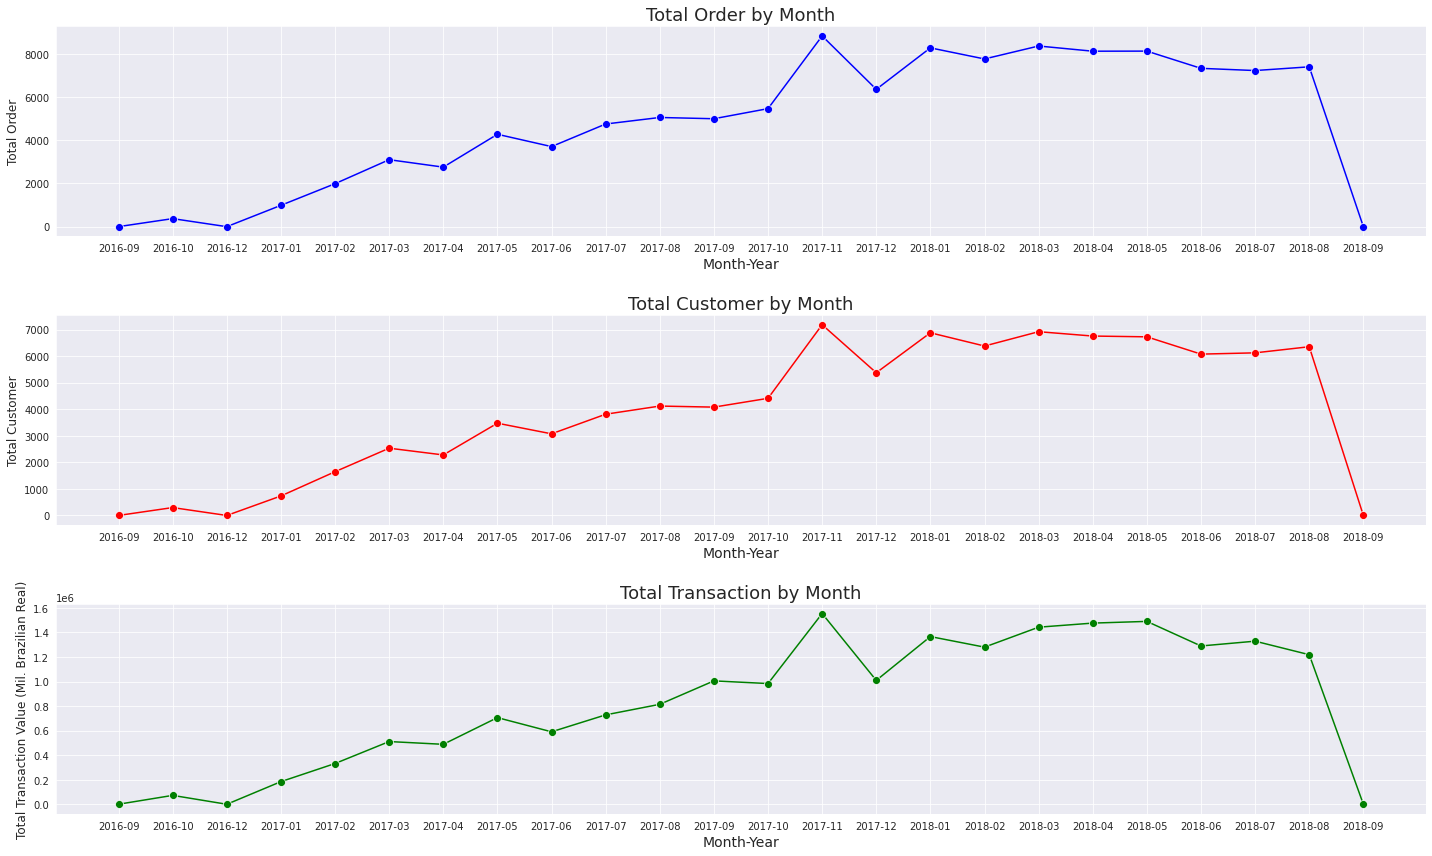

In [ ]:
# Group by order, customer, and transaction
order_per_month = df['order_id'].groupby(df['month_year_order']).count()
customer_per_month = df['customer_unique_id'].groupby(df['month_year_order']).nunique()
transaction_per_month = df['payment_value'].groupby(df['month_year_order']).sum()

# Visualization
plt.figure(figsize=(20, 12))

plt.subplot(311)
sns.lineplot(x=order_per_month.index, y=order_per_month.values, marker='o', markersize=8, color='blue')
plt.title('Total Order by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Order', fontsize=12)

plt.subplot(312)
sns.lineplot(x=customer_per_month.index, y=customer_per_month.values, marker='o', markersize=8, color='red')
plt.title('Total Customer by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Customer', fontsize=12)

plt.subplot(313)
sns.lineplot(x=transaction_per_month.index, y=transaction_per_month.values, marker='o', markersize=8, color='green')
plt.title('Total Transaction by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Transaction Value (Mil. Brazilian Real)', fontsize=12)

plt.tight_layout()
plt.show()

#Top customers and top products

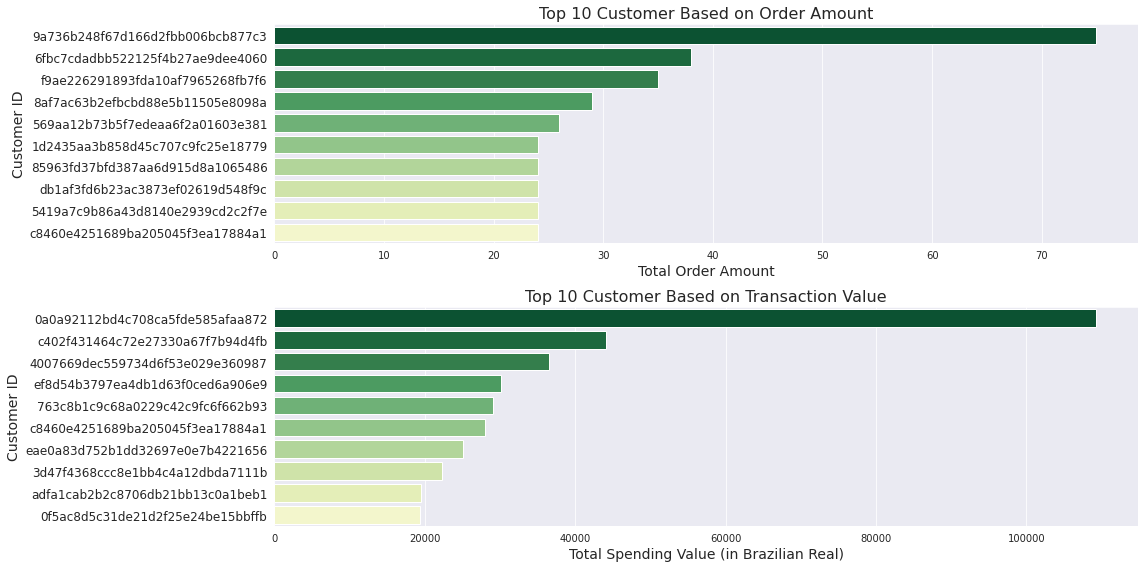

In [ ]:
# Top 10 customer by order
top_10_customer_order = df['order_id'].groupby(df['customer_unique_id']).count().sort_values(ascending=False)[:10]

# Top 10 customer by payment value
top_10_customer_transaction = df['payment_value'].groupby(df['customer_unique_id']).sum().sort_values(ascending=False)[:10]

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(211)
sns.barplot(y=top_10_customer_order.index, x=top_10_customer_order.values, palette='YlGn_r')
plt.title('Top 10 Customer Based on Order Amount',fontsize=16)
plt.xlabel('Total Order Amount',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(212)
sns.barplot(y=top_10_customer_transaction.index, x=top_10_customer_transaction.values, palette='YlGn_r')
plt.title('Top 10 Customer Based on Transaction Value',fontsize=16)
plt.xlabel('Total Spending Value (in Brazilian Real)',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

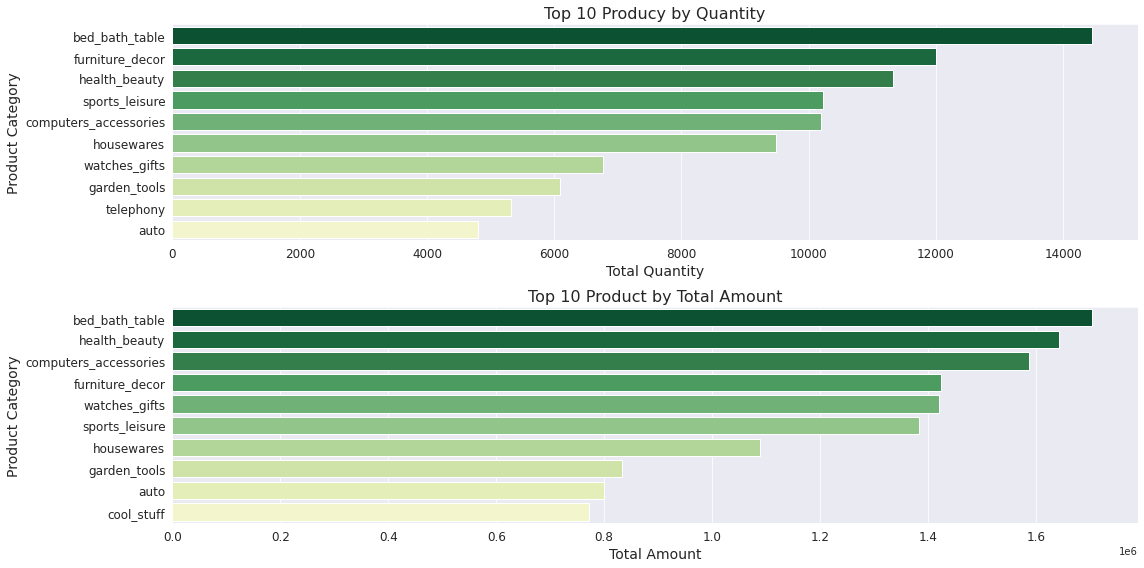

In [ ]:
# Top 10 Category Product 
top_10_product_by_quantity = df['order_item_id'].groupby(df['product_category_name_english']).sum().sort_values(ascending=False)[:10]
top_10_product_by_payment_value = df['payment_value'].groupby(df['product_category_name_english']).sum().sort_values(ascending=False)[:10]

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(211)
sns.barplot(y=top_10_product_by_quantity.index, x=top_10_product_by_quantity .values, palette='YlGn_r')
plt.title('Top 10 Producy by Quantity',fontsize=16)
plt.xlabel('Total Quantity',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(212)
sns.barplot(y=top_10_product_by_payment_value.index, x=top_10_product_by_payment_value.values, palette='YlGn_r')
plt.title('Top 10 Product by Total Amount',fontsize=16)
plt.xlabel('Total Amount',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#Payment values by state

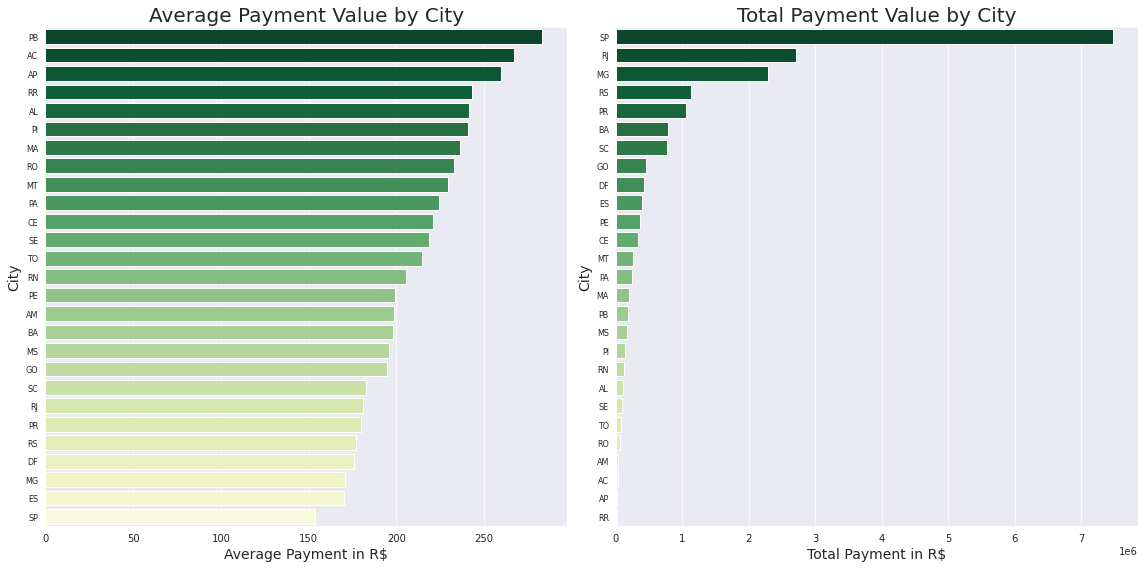

In [ ]:
# Top City berdasarkan rata-rata pembayaran
top_10_town_avg = df['payment_value'].groupby(df['customer_state']).mean().sort_values(ascending=False)

# Top City berdasarkan total pembayaran
top_10_town_sum = df['payment_value'].groupby(df['customer_state']).sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(y=top_10_town_avg.index, x=top_10_town_avg.values, palette='YlGn_r')
plt.title('Average Payment Value by City',fontsize=20)
plt.xlabel('Average Payment in R$',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.subplot(122)
sns.barplot(y=top_10_town_sum.index, x=top_10_town_sum.values, palette='YlGn_r')
plt.title('Total Payment Value by City',fontsize=20)
plt.xlabel('Total Payment in R$',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

#Payment value distribution

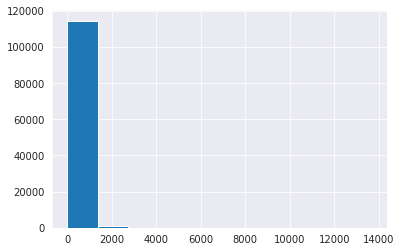

In [ ]:
# Distribusi Payment Value
(df['payment_value']).hist()

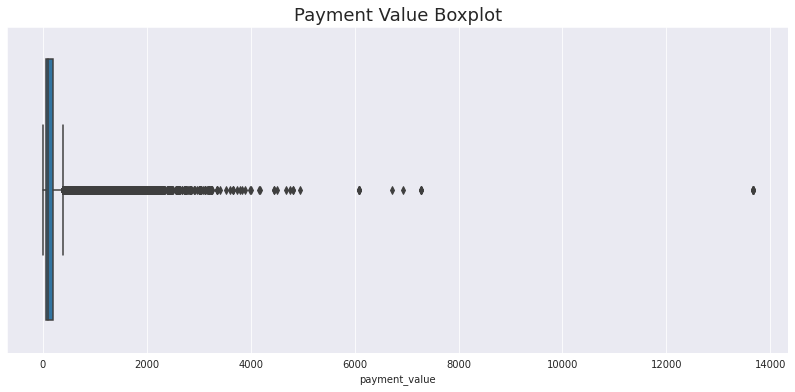

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(df['payment_value'])
plt.title('Payment Value Boxplot', fontsize=18)
plt.show()

#Payment Type

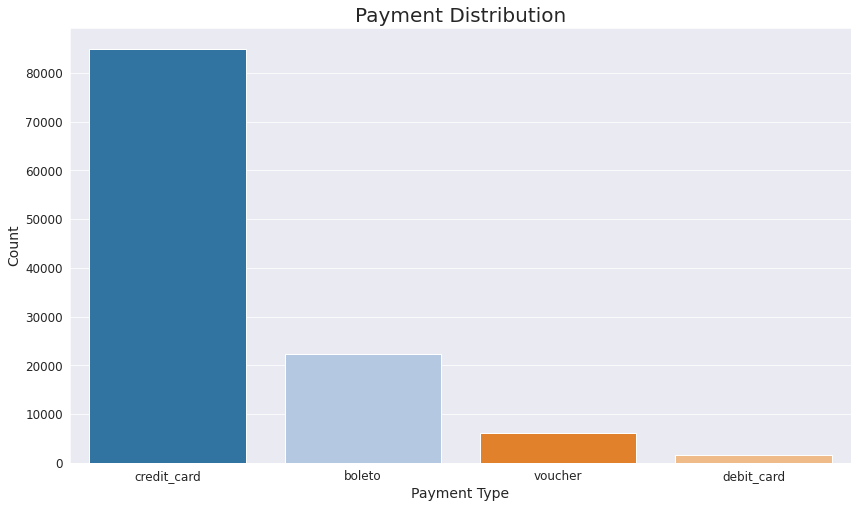

In [ ]:
# Visualization Payment Type Distribution

plt.figure(figsize=(14,8))
sns.countplot(x='payment_type', data=df, palette='tab20')
plt.title('Payment Distribution',fontsize=20)
plt.xlabel('Payment Type',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#Review Score

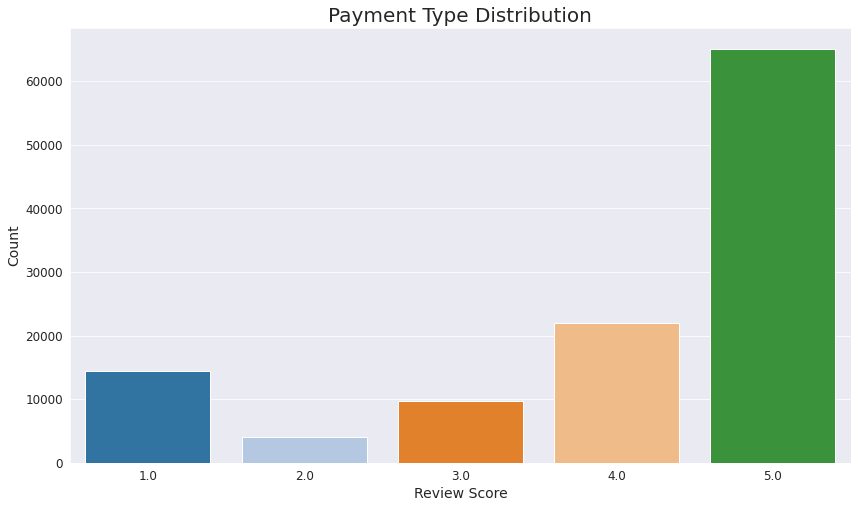

In [ ]:
# Visualization Review Score Distribution

plt.figure(figsize=(14,8))
sns.countplot(x='review_score', data=df, palette='tab20')
plt.title('Payment Type Distribution',fontsize=20)
plt.xlabel('Review Score',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print('Score 5:', df[df['review_score']==5.0]['order_id'].count(), 'reviews')
print('Score 4:', df[df['review_score']==4.0]['order_id'].count(), 'reviews')
print('Score 3:', df[df['review_score']==3.0]['order_id'].count(), 'reviews')
print('Score 2:', df[df['review_score']==2.0]['order_id'].count(), 'reviews')
print('Score 1:', df[df['review_score']==1.0]['order_id'].count(), 'reviews')

Score 5: 65085 reviews
Score 4: 21905 reviews
Score 3: 9697 reviews
Score 2: 4017 reviews
Score 1: 14492 reviews
